#  An intro to the Python numerical stack

- hello
- world
- rahul

$$\alpha + \beta = \gamma$$

this is **bold** and this is *italics*

In [1]:
# The %... is an iPython thing, and is not part of the Python language.
# In this case we're just telling the plotting library to draw things on
# the notebook, instead of on a separate window.
%matplotlib inline 
#this line above prepares IPython notebook for working with matplotlib

# See all the "as ..." contructs? They're just aliasing the package names.
# That way we can call methods like plt.plot() instead of matplotlib.pyplot.plot().

import numpy as np # imports a fast numerical programming library
import scipy as sp #imports stats functions, amongst other things
import matplotlib as mpl # this actually imports matplotlib
import matplotlib.cm as cm # allows us easy access to colormaps
import matplotlib.pyplot as plt #sets up plotting under plt
import pandas as pd #lets us handle data as dataframes
#sets up pandas table display
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn.apionly as sns #sets up styles and gives us more plotting options

//anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
//anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
//anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


## Pandas 

Here is a cheatsheet for Pandas you night find useful: https://drive.google.com/folderview?id=0ByIrJAE4KMTtaGhRcXkxNHhmY2M&usp=sharing

TODO: copy 5 commands docs from cheatsheat

### Reading data in from a file

A lots of the data out there in the world is in CSV files. If not, it can be put into a csv file unless its too big. If its too big, its probably  in a database where it looks like a CSV file.

What so we mean  when we say that it looks like a CSV file? We mean that its **rectangular**, that is there  are some features/variables/co-variates of the data in columns, with observations in rows. These observations constitute a **sample** of the data, where we generally assume that the sample is drawn from the entire universe of possible observations of this type.

Here we read in some car data (from R) from a CSV file. Note that CSV files can be output by any spreadsheet software, and are plain text, so make a great way to share data. 

The documentation for this data is [here](https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/mtcars.html) but I have extracted some relevant parts below:

```
Description

The data was extracted from the 1974 Motor Trend US magazine, and comprises fuel consumption and 10 aspects of automobile design and performance for 32 automobiles (1973–74 models).

Usage

mtcars
Format

A data frame with 32 observations on 11 variables.

[, 1]	mpg	Miles/(US) gallon
[, 2]	cyl	Number of cylinders
[, 3]	disp	Displacement (cu.in.)
[, 4]	hp	Gross horsepower
[, 5]	drat	Rear axle ratio
[, 6]	wt	Weight (1000 lbs)
[, 7]	qsec	1/4 mile time
[, 8]	vs	V/S
[, 9]	am	Transmission (0 = automatic, 1 = manual)
[,10]	gear	Number of forward gears
[,11]	carb	Number of carburetors
Source

Henderson and Velleman (1981), Building multiple regression models interactively. Biometrics, 37, 391–411.
```

Let us capture this spreadsheet in **memory**. The structure we capture it in is called a pandas **dataframe**. 

In [3]:
!cat data/mtcars.csv

"","mpg","cyl","disp","hp","drat","wt","qsec","vs","am","gear","carb"
"Mazda RX4",21,6,160,110,3.9,2.62,16.46,0,1,4,4
"Mazda RX4 Wag",21,6,160,110,3.9,2.875,17.02,0,1,4,4
"Datsun 710",22.8,4,108,93,3.85,2.32,18.61,1,1,4,1
"Hornet 4 Drive",21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
"Hornet Sportabout",18.7,8,360,175,3.15,3.44,17.02,0,0,3,2
"Valiant",18.1,6,225,105,2.76,3.46,20.22,1,0,3,1
"Duster 360",14.3,8,360,245,3.21,3.57,15.84,0,0,3,4
"Merc 240D",24.4,4,146.7,62,3.69,3.19,20,1,0,4,2
"Merc 230",22.8,4,140.8,95,3.92,3.15,22.9,1,0,4,2
"Merc 280",19.2,6,167.6,123,3.92,3.44,18.3,1,0,4,4
"Merc 280C",17.8,6,167.6,123,3.92,3.44,18.9,1,0,4,4
"Merc 450SE",16.4,8,275.8,180,3.07,4.07,17.4,0,0,3,3
"Merc 450SL",17.3,8,275.8,180,3.07,3.73,17.6,0,0,3,3
"Merc 450SLC",15.2,8,275.8,180,3.07,3.78,18,0,0,3,3
"Cadillac Fleetwood",10.4,8,472,205,2.93,5.25,17.98,0,0,3,4
"Lincoln Continental",10.4,8,460,215,3,5.424,17.82,0,0,3,4
"Chrysler Imperial",14.7,8,440,230,3.23,5.345,17.42,0,0,3,4
"Fiat 128",32.4,4,78.7

In [4]:
dfcars=pd.read_csv("data/mtcars-course.csv")
dfcars.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,A,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,A,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,A,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,M,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,M,3,2


Notice we have a table! A spreadsheet! And it indexed the rows (the 0,1,2,3,4...to the left in bold font)

`dfcars`, in python parlance, is an instance of the pd.DataFrame class, created by calling the pd.read_csv function, which calls the DataFrame constructor inside of it. If you dont understand this sentence, dont worry, it will become clearer later. What you need to take away is that `dfcars` is a dataframe object, and it has methods, or functions belonging to it, which allow it to do things. For example `df.head()` is a method that shows the first 5 rows of the dataframe.

The model for a pandas dataframe is that of a set of columns pasted together into a spreadsheet. This is slightly different from the model that you might be used to from Excel or Google Sheets, where you might make the spreadsheet a row at a time...

![](images/pandastruct.png)

(image stolen from the cheatsheet above)

In [5]:
#load mtcars.csv from the data folder
dfcars=pd.read_csv("data/mtcars.csv")
dfcars.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


There is an ugly  poorly named column right here. Lets fix that.

In [6]:
dfcars=dfcars.rename(columns={"Unnamed: 0":"name"})
dfcars.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


Notice that we  created a new dataframe but renamed it as `dfcars`. This is because variables in python are just **bindings**: they are just aliases for a piece of memory.  The `rename` method on dataframes creates a new dataframe, and we rebind the variable `dfcars` to point to this new piece of memory. What about the old piece of memory `dfcars` pointed to? Its now  bindingless and will be destroyed by Python's garbage collector. This is how python manages memory on your computer.

Unless youhave very limited memory on your computer, this is the recommended style of python programming. Dont create a `dfcars2`. If you have very limited memory, almost all pandas methods have a `inplace=True` option, see the `rename` docs for example.  You can then say:
```
In[3]: dfcars.rename(columns={"Unnamed: 0":"name"}, inplace=True)
```

without reassigning, and the column will be updated in memory. 

In [7]:
dfcars = pd.read_csv("data/mtcars-course.csv")
dfcars.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,A,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,A,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,A,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,M,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,M,3,2


### Properties of dataframes

Here are some of the properties of our dataframe. The `shape` tells us the `rows x columns` we have.

In [10]:
dfcars.shape # 12 columns, each of length 32

(32, 12)

The columns may also be obtained as an attribute:

In [11]:
dfcars.columns

Index(['name', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb'], dtype='object')

### Types of the columns

Columns in a dataframe come with their own types. Some data may be categorical..they come  with only few well defined values. An example is cylinders  (`cyl`). Cars may be 4, 6, or 8 cylindered. There is a ordered interpretation to this  (8 cylinders more powerful engine) but also a one-of-three-types interpretation to this. 

Sometimes categorical data does not have an ordered interpretation. An example is `am`: a boolean variable which indicates whether the car is an automatic or not.

Other column types ate integer, floating-point, and `object`. The latter is a catchall for anything Pandas could not infer, or a string.
 
Lets see the types of the columns...

In [12]:
dfcars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
name    32 non-null object
mpg     32 non-null float64
cyl     32 non-null int64
disp    32 non-null float64
hp      32 non-null int64
drat    32 non-null float64
wt      32 non-null float64
qsec    32 non-null float64
vs      32 non-null int64
am      32 non-null object
gear    32 non-null int64
carb    32 non-null int64
dtypes: float64(5), int64(5), object(2)
memory usage: 3.1+ KB


In [13]:
dfcars.dtypes

name     object
mpg     float64
cyl       int64
disp    float64
hp        int64
drat    float64
wt      float64
qsec    float64
vs        int64
am       object
gear      int64
carb      int64
dtype: object

The `dtypes` attribute tells us what kind of columns we have. Some are floating-point numbers, and these typically have continuous values. The other which are integers  have integer values like 2 carbouretters, but you could consider these as **categorical or factor variables** as well: a number of carbouretters factor. `am` is a factor coded as an integer where 0 is automatic and 1 is manual. TODO: categoricals

`dtypes` are useful for debugging. If one of these columns is not the type you expect, it can point to missing or malformed values and you ought to go investigating. Pandas assigns these types by inspection of some of the values, and if the types are mixed it will make this an `object`, like the `name` column. This process is called **type inference**.

Conside an example:

In [14]:
different_values = ['a', 1, 2, 3]
different_series = pd.Series(different_values)
different_series

0    a
1    1
2    2
3    3
dtype: object

In [15]:
different_series.dtypes # object because type inference fails

dtype('O')

In [16]:
similar_values = [2, 3, 4]
similar_series = pd.Series(similar_values)
similar_series

0    2
1    3
2    4
dtype: int64

In [17]:
similar_series.dtypes # correctly infers ints

dtype('int64')

In [18]:
trans_map = dict(M=0, A=1)
trans_map

{'A': 1, 'M': 0}

In [ ]:
def my_function(x):
    return trans_map[x]

In [19]:
dfcars.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,A,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,A,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,A,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,M,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,M,3,2


In [20]:
dfcars.am

0     A
1     A
2     A
3     M
4     M
5     M
6     M
7     M
8     M
9     M
10    M
11    M
12    M
13    M
14    M
15    M
16    M
17    A
18    A
19    A
20    M
21    M
22    M
23    M
24    M
25    A
26    A
27    A
28    A
29    A
30    A
31    A
Name: am, dtype: object

In [22]:
dfcars['am']

0     A
1     A
2     A
3     M
4     M
5     M
6     M
7     M
8     M
9     M
10    M
11    M
12    M
13    M
14    M
15    M
16    M
17    A
18    A
19    A
20    M
21    M
22    M
23    M
24    M
25    A
26    A
27    A
28    A
29    A
30    A
31    A
Name: am, dtype: object

In [23]:
dfcars['am'] = dfcars['am'].apply(lambda x: trans_map[x])
dfcars.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [24]:
dfcars.dtypes

name     object
mpg     float64
cyl       int64
disp    float64
hp        int64
drat    float64
wt      float64
qsec    float64
vs        int64
am        int64
gear      int64
carb      int64
dtype: object

### Saving

Lets save this out:

In [25]:
dfcars.to_csv("data/mtcars-cleaned.csv", index=False)

In [26]:
!cat data/mtcars-cleaned.csv

name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.9,2.62,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.9,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.32,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.44,17.02,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.46,20.22,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.57,15.84,0,0,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.19,20.0,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.15,22.9,1,0,4,2
Merc 280,19.2,6,167.6,123,3.92,3.44,18.3,1,0,4,4
Merc 280C,17.8,6,167.6,123,3.92,3.44,18.9,1,0,4,4
Merc 450SE,16.4,8,275.8,180,3.07,4.07,17.4,0,0,3,3
Merc 450SL,17.3,8,275.8,180,3.07,3.73,17.6,0,0,3,3
Merc 450SLC,15.2,8,275.8,180,3.07,3.78,18.0,0,0,3,3
Cadillac Fleetwood,10.4,8,472.0,205,2.93,5.25,17.98,0,0,3,4
Lincoln Continental,10.4,8,460.0,215,3.0,5.4239999999999995,17.82,0,0,3,4
Chrysler Imperial,14.7,8,440.0,230,3.23,5.345,17.42,0,0,3,4
Fiat 128,32.4,4,78.7,66,4.08,2.2,

Pandas `describe` gives us a nice statistical summary, in its own dataframe:

In [27]:
dfcars.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


### Accessing columns

Like in a dictionary, we can get each column. The type of the resulting column is a Pandas **Series**. Indeed a dataframe is formed by pasting together many series. 

In [28]:
type(dfcars['carb'])

pandas.core.series.Series

In [29]:
dfcars['carb'] #you can also use df.carb (wont work for column names with spaces)

0     4
1     4
2     1
3     1
4     2
5     1
6     4
7     2
8     2
9     4
10    4
11    3
12    3
13    3
14    4
15    4
16    4
17    1
18    2
19    1
20    1
21    2
22    2
23    4
24    2
25    1
26    2
27    2
28    4
29    6
30    8
31    2
Name: carb, dtype: int64

One may also access columns using a "property" like notation, but clearly this wont fork for clumn names that have spaces in them.

In [30]:
dfcars.carb

0     4
1     4
2     1
3     1
4     2
5     1
6     4
7     2
8     2
9     4
10    4
11    3
12    3
13    3
14    4
15    4
16    4
17    1
18    2
19    1
20    1
21    2
22    2
23    4
24    2
25    1
26    2
27    2
28    4
29    6
30    8
31    2
Name: carb, dtype: int64

## Pandas is built on top of numpy

`numpy` is Python's numerical programming library. It provides arrays in multiple dimensions, and operations that work on these arrays. You ought to use `numpy` for scientific programming, regular python lists are just too slow.

You can get the numpy arrays corresponding to pandas series and dataframes using the values attribute.

In [31]:
dfcars['carb'].values

array([4, 4, 1, 1, 2, 1, 4, 2, 2, 4, 4, 3, 3, 3, 4, 4, 4, 1, 2, 1, 1, 2, 2,
       4, 2, 1, 2, 2, 4, 6, 8, 2])

`dtypes` work for these as well

In [32]:
dfcars['carb'].values.dtype

dtype('int64')

You can construct numpy arrays yourself

In [33]:
my_array = np.array([1,2,3], dtype="int64")
my_array

array([1, 2, 3])

In [34]:
my_array = np.array([1,2,3,4,5], dtype="float64")
my_array

array([ 1.,  2.,  3.,  4.,  5.])

> YOUR TURN NOW

>Create an array of 10 random numbers from the Normal distribution with 0 mean and standard deviation 1

In [35]:
# your code here
np.random.normal(0, 1, 10)

array([-0.05528622,  0.97575135, -0.23017842,  2.13584681, -0.67365319,
       -1.18888404,  1.94849467, -0.97705908,  1.14584292, -0.35616054])

In [36]:
np.random.randn(10)

array([-1.1481529 , -0.19204383, -0.5635694 ,  0.23209148, -1.0144706 ,
        0.06526005,  0.2204901 ,  1.5464459 ,  2.35808567, -0.0302109 ])

## Visualizing your data

You can first see what color palette you are using. If you make multiple curves in a plot, these are the colors that will be sequentially used.

In [39]:
color_palette = sns.color_palette()
color_palette

//anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


[(0.0, 0.0, 1.0),
 (0.0, 0.5, 0.0),
 (1.0, 0.0, 0.0),
 (0.0, 0.75, 0.75),
 (0.75, 0, 0.75),
 (0.75, 0.75, 0),
 (0.0, 0.0, 0.0)]

Seaborn's `palplot` lets you visualize the colormap you are using. We are using matplotlib's default colormap, which looks like so:

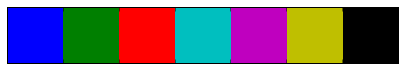

In [41]:
%matplotlib inline
sns.palplot(color_palette)

### Histograms

Let us call below `.hist` method of a Pandas series. This is an example of the way Pandas makes visualization for us easy. See the Pandas Viz documentation for more details.

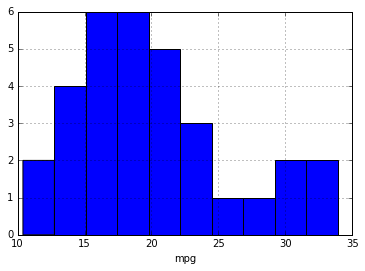

In [42]:
dfcars.mpg.hist()
plt.xlabel("mpg");

We can also call the `matplotlib` `hist` fuction on a pandas series (or for that matter, anything listy, like a python list or a numpy array). 

Notice that the style is different: in the image above, pandas imposed some style setttings on us. We'll learn more about plot styles as the course progresses.

In the `hist` function  you can also change the number of bins, and the transparency of the color.

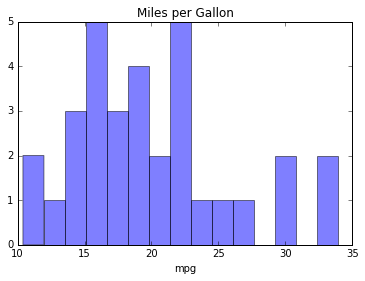

In [45]:
plt.hist(dfcars.mpg, bins=15, alpha=0.5);
plt.xlabel("mpg");
plt.title("Miles per Gallon");

Here are the most commonly used matplotlib plotting routines.

![](images/mpl1.png)



> YOUR TURN NOW

>Convert the "mpg" series can be converted to a numpy array with the `values` attribute Set x limits to be between 0 and 40. 

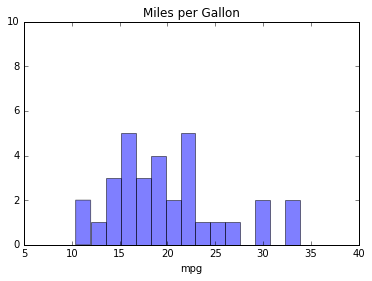

In [48]:
# your code now
plt.hist(dfcars.mpg.values, bins=15, alpha=0.5);
plt.xlim(5, 40)
plt.ylim(0, 10)
plt.xlabel("mpg");
plt.title("Miles per Gallon");

Next we will use  seaborn to change the axes style. Here we use a dark grid. (See the seaborn docs for more styles). The rest is your job.

We also show how to label a plot and obtain a legend from the plot. A vertical line is drawn at the mean, capturing the color used in the histogram and using it again.

One can set bins using a list, and also label the histogram.  Finally one can "normalize" the histogram to put the frequencies on a probability scale

//anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


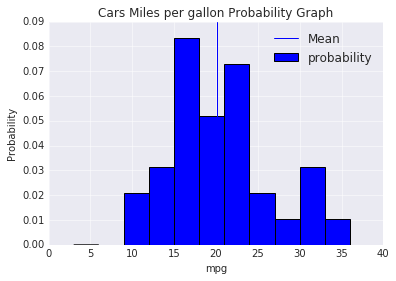

In [50]:
with sns.axes_style("darkgrid"):
    color = sns.color_palette()[0]
    plt.hist(dfcars.mpg.values, bins=range(3, 40, 3), label="probability", color=color, normed=True)
    plt.axvline(dfcars.mpg.mean(), 0, 1.0, color=color, label='Mean')
    plt.xlabel("mpg")
    plt.ylabel("Probability")
    plt.title("Cars Miles per gallon Probability Graph")
    plt.legend()

### Plotting features against other features

Sometimes we want to see co-variation amongst our columns. A scatter-plot does this for us. 

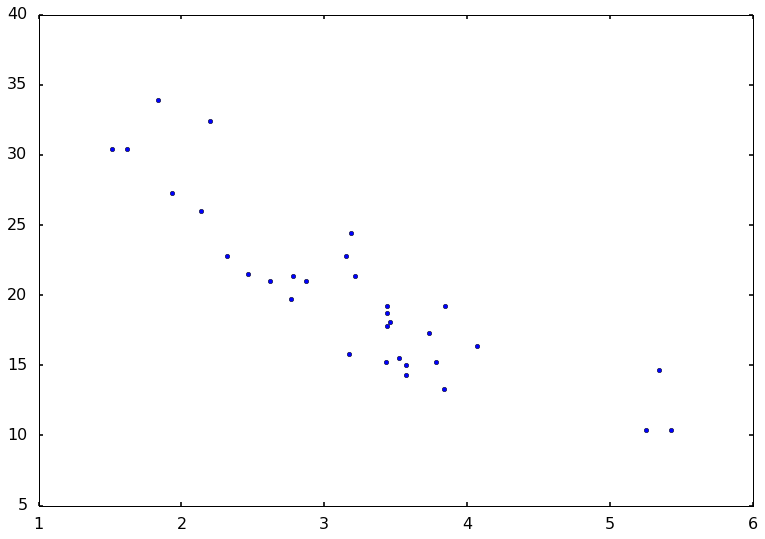

In [51]:
with sns.plotting_context('poster'): #temporarily make plot large
    plt.scatter(dfcars.wt, dfcars.mpg)

You can use matplotlib's `plot` instead.

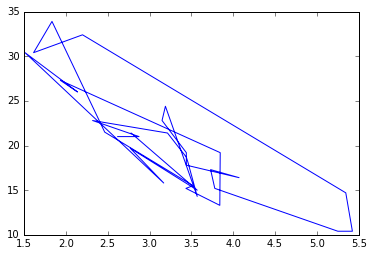

In [52]:
plt.plot(dfcars.wt, dfcars.mpg)

This gave us spagetti lines. Why? 

One can use markers instead of lines. Also see how the semicolon suppresses the text output like `[<matplotlib.lines.Line2D at 0x10ffbd978>]`. The semicolon will generally supress the return value of any python function.

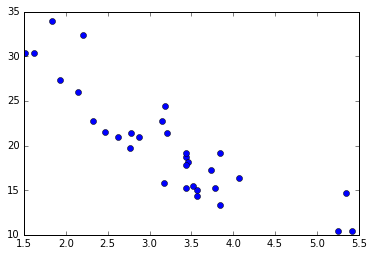

In [53]:
plt.plot(dfcars.wt, dfcars.mpg, 'o');

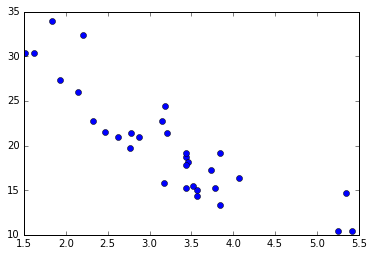

In [54]:
plt.plot(dfcars.wt, dfcars.mpg, 'o')
plt.show()

But what if we want to save our figure into a file? The extension tells you how it will be saved..and note that the `savefig` needs to be in the same cell as the plotting commands. Go look at the files..

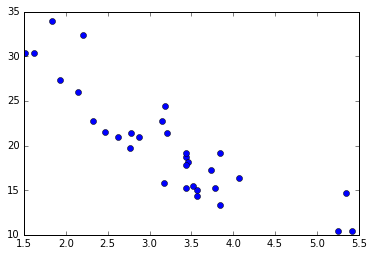

In [55]:
plt.plot(dfcars.wt, dfcars.mpg, 'o')
plt.savefig('foo1.pdf')
plt.savefig('foo2.png', bbox_inches='tight') #less whitespace around image

## Masks and Queries

A dataframe is useless if you cant dice/sort/etc it. To do this, one needs to use the concept of a **boolean mask**.

In [34]:
dfcars.mpg < 20

This gives us Trues and Falses. Such a series is called a **mask**.  A mask  is the basis of filtering. We can do:

In [35]:
dfcars[dfcars.mpg < 20]

Notice that the dataframe(spreadsheet) has been filtered down to only include those carws with mpg < 20. The rows with `False` in the mask have been eliminated, and those with `True` in the mask have been kept.

In [36]:
np.sum(dfcars.mpg < 20)

Why did that work? The booleans are coerced to integers as below:

In [37]:
1*True, 1*False

If we count the number of Trues, and divide by the total, we'll get the fraction of  cars with mpg < 20. Thus you can get probabilities by computing sample means (since you divide by the total number of items, and those not fitting the query give 0)

In [38]:
np.mean(dfcars.mpg < 20)

Or directly, in Pandas, which works since dfcars.mpg is a pandas Series.

In [39]:
(dfcars.mpg < 20).mean()